In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [13]:
sentiment_raw = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
sentiment_raw.columns = ['message', 'label']

In [14]:
keywords = ['good', 'great', 'ideal', 'nice', 'excellent', 'highly','loved','best']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sentiment_raw[str(key)] = sentiment_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [22]:
sentiment_raw.head()

,message,label,good,great,ideal,nice,excellent,highly,loved,best
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,True,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False


In [28]:
# Brief write-up of feature engineering:
# I chose to select for positive reviews using words like 'good' and 'great,' because it seemed to me that negative
# reviews can tend to be less direct and more varied. 
# However, it occurred to me that it would also be possible to add in another feature to the same model
# based on obviously negative remarks - the boolean in those columns would just have to be the inverse to make
# the logic consistent (e.g.: does not contain "worst")

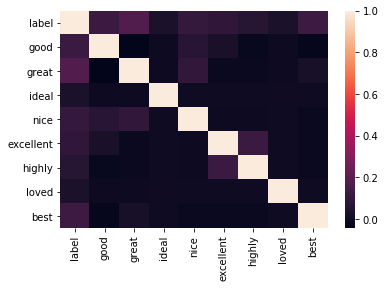

In [15]:
sns.heatmap(sentiment_raw.corr())

In [16]:
data = sentiment_raw[keywords]
target = sentiment_raw['label']
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 409


In [ ]:
# This appears to be pretty good - more than half! But maybe part of the problem is putting spaces around the key - 
# we seem to be missing "Good" and "Great" if it appears at the beginning of remarks. 

In [23]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sentiment_raw[str(key)] = sentiment_raw.message.str.contains(
        str(key),
        case=False
    )

In [24]:
data = sentiment_raw[keywords]
target = sentiment_raw['label']
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 309


In [ ]:
# Better results!

In [17]:
# Trying on the imdb database
sentiment_raw2 = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
sentiment_raw2.columns = ['message', 'label']

In [25]:
keywords2 = ['good', 'great', 'nice', 'excellent', 'highly','loved','best']
#removed 'ideal' because it did not appear in correlation matrix

for key in keywords2:
    sentiment_raw2[str(key)] = sentiment_raw2.message.str.contains(
        str(key),
        case=False
    )

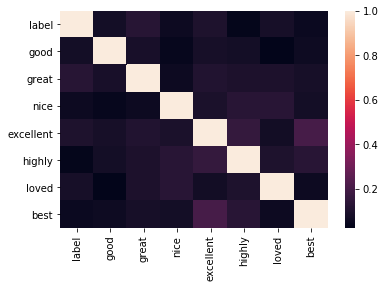

In [26]:
sns.heatmap(sentiment_raw2.corr())

In [27]:
data = sentiment_raw2[keywords2]
target = sentiment_raw2['label']
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 318
